               Close
Date                
1997-05-15  1.958333
1997-05-16  1.729167
1997-05-19  1.708333
1997-05-20  1.635417
1997-05-21  1.427083


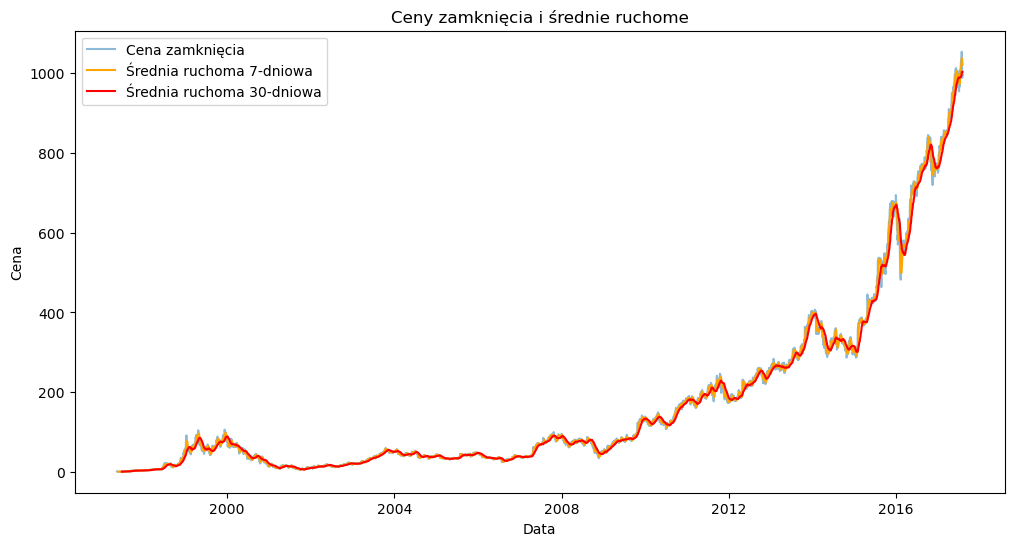

<Figure size 1200x600 with 0 Axes>

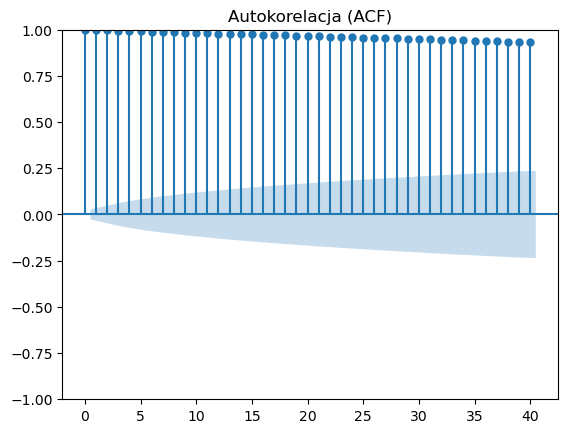

<Figure size 1200x600 with 0 Axes>

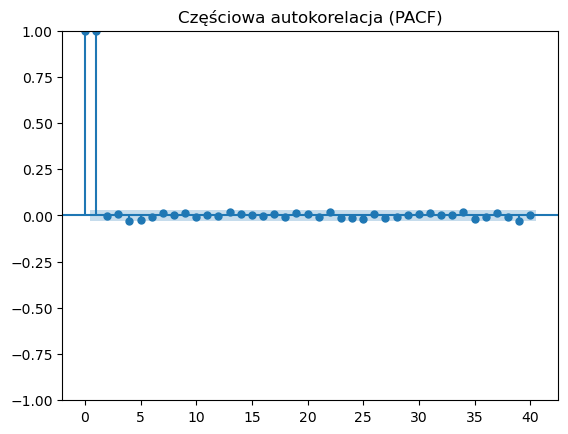

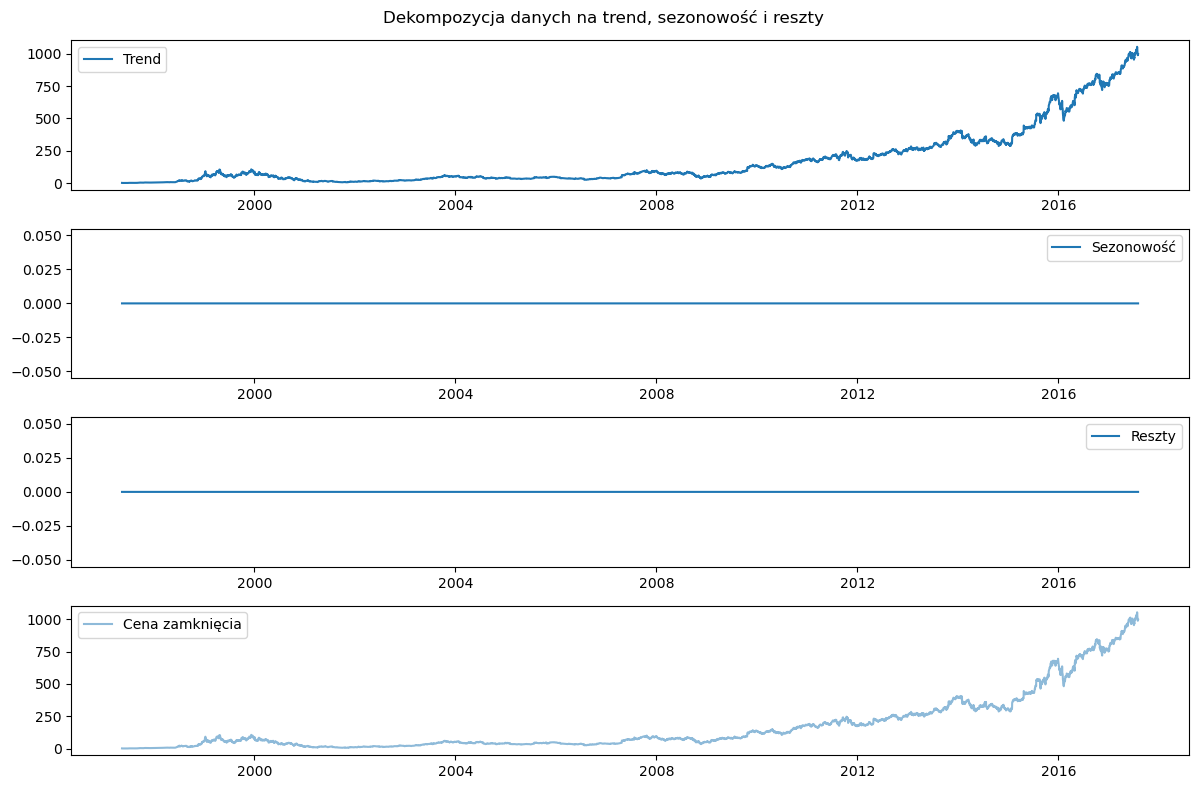

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Wczytanie danych z pliku CSV
# Załóżmy, że plik CSV ma kolumny: 'Date' (data) i 'Close' (cena zamknięcia)
file_path = "AMZN.csv"  # Zmień na właściwą ścieżkę do pliku
data = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Sprawdzenie pierwszych kilku wierszy danych
print(data.head())

# 2. Obliczenie średnich ruchomych
data["MA_7"] = data["Close"].rolling(window=7).mean()  # Średnia ruchoma 7-dniowa
data["MA_30"] = data["Close"].rolling(window=30).mean()  # Średnia ruchoma 30-dniowa

# Wykres cen zamknięcia i średnich ruchomych
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Cena zamknięcia", alpha=0.5)
plt.plot(data["MA_7"], label="Średnia ruchoma 7-dniowa", color="orange")
plt.plot(data["MA_30"], label="Średnia ruchoma 30-dniowa", color="red")
plt.title("Ceny zamknięcia i średnie ruchome")
plt.xlabel("Data")
plt.ylabel("Cena")
plt.legend()
plt.show()

# 3. Analiza ACF i PACF
# Obliczenie ACF i PACF
acf_values = acf(data["Close"].dropna(), nlags=40)
pacf_values = pacf(data["Close"].dropna(), nlags=40)

# Wykres ACF
plt.figure(figsize=(12, 6))
plot_acf(data["Close"].dropna(), lags=40, title="Autokorelacja (ACF)")
plt.show()

# Wykres PACF
plt.figure(figsize=(12, 6))
plot_pacf(data["Close"].dropna(), lags=40, title="Częściowa autokorelacja (PACF)")
plt.show()

# 4. Dekompozycja danych na trend, sezonowość i reszty
# Dekompozycja z użyciem modelu addytywnego (zakładamy brak sezonowości w danych dziennych)
decomposition = seasonal_decompose(data["Close"], model="additive", period=1)

# Wykres dekompozycji
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label="Trend")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label="Sezonowość")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label="Reszty")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data["Close"], label="Cena zamknięcia", alpha=0.5)
plt.legend()

plt.suptitle("Dekompozycja danych na trend, sezonowość i reszty")
plt.tight_layout()
plt.show()